#Profile
Nama  : Fadel Amili

Email : Fadelamili11@gmail.com


#Scrapping Data E-comerce

In [ ]:
# Install Library
!pip install selenium
#!apt- get install chromium-chromedriver
!pip install requests beautifulsoup4
!apt-get install chromium-driver
!pip install openpyxl # Untuk mensave data exxel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.0/476.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'chromium-chromedriver' instead of 'chromium-driver'
The following additional packages will be installed:
  apparmor chromium-browser libfuse3-3 liblzo2-2 libudev1 snapd squashfs-tools systemd-hwe-hwdb
  udev
Suggested packages:
  apparmor-profiles-extra apparmor-utils fuse3 zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver libfuse3-3 liblzo2-2 snapd squashfs-tools
  systemd-hwe-hwdb udev
The following packages will be upgraded:
  libudev1
1 upgraded, 9 newly installed, 0 to remove and 48 not upgraded.
Need to get 28.5 MB of archives.
After this operation, 118 MB of additional disk

In [ ]:
# Import Library
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd

In [ ]:
#Inisialized webdriver
def web_driver():
  options = Options()
  options.add_argument('--verbose')
  options.add_argument('--no-sandbox')
  options.add_argument('--headless')
  options.add_argument('--disable-gpu')
  options.add_argument('--window-size=1920,1200')
  options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome(service= Service(),options=options)
  return driver

#Scrapping blibli

In [ ]:
url = 'https://www.blibli.com/cari/hp%20android%20samsung'
driver = web_driver()
driver.get(url)
time.sleep(3)



In [ ]:
driver.page_source

'<html lang="en"><head>\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <link rel="icon" type="image/png" sizes="16x16" href="https://www.static-src.com/siva/asset/09_2023/homepage_favicon_rebranding.png">\n    <link rel="icon" type="image/png" sizes="32x32" href="https://www.static-src.com/siva/asset/10_2023/icon-32px.png">\n    <link rel="icon" type="image/png" sizes="60x60" href="https://www.static-src.com/siva/asset/10_2023/icon-60px.png">\n    <link rel="icon" type="image/png" sizes="144x144" href="https://www.static-src.com/siva/asset/10_2023/icon-144px.png">\n    <link rel="preconnect" href=" https://fonts.googleapis.com">\n    <link rel="preconnect" href=" https://fonts.gstatic.com" crossorigin="">\n    <style>/* cyrillic-ext */\n@font-face {\n  font-family: \'Roboto\';\n  font-style: normal;\n  font-weight: 400;\n  src: url(data:font/woff2;base64,d09GMgABAAAAACicAA4AAAAATmQAAChFAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGoFGG5J

In [ ]:
soup1 = BeautifulSoup(driver.page_source, "html.parser")


In [ ]:
driver.close()

In [ ]:
print(soup1.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://www.static-src.com/siva/asset/09_2023/homepage_favicon_rebranding.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="https://www.static-src.com/siva/asset/10_2023/icon-32px.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="https://www.static-src.com/siva/asset/10_2023/icon-60px.png" rel="icon" sizes="60x60" type="image/png"/>
  <link href="https://www.static-src.com/siva/asset/10_2023/icon-144px.png" rel="icon" sizes="144x144" type="image/png"/>
  <link href=" https://fonts.googleapis.com" rel="preconnect"/>
  <link crossorigin="" href=" https://fonts.gstatic.com" rel="preconnect"/>
  <style>
   /* cyrillic-ext */
@font-face {
  font-family: 'Roboto';
  font-style: normal;
  font-weight: 400;
  src: url(data:font/woff2;base64,d09GMgABAAAAACicAA4AAAAATmQAAChFAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGoFGG5JaHDQGYACDAhEMCvMI3BoL

In [ ]:
data_blibli = []
counter = 0

#product-card__INL-60035-01167 > div > div.blu-product__btm > div:nth-child(1) > div > div.blu-product__title-content > div.blu-product__name
# blu-product__wrapper
for item in soup1.findAll('div', class_="product-list product-list__container__side"):
  produk = item.findAll('div', class_="product-card product-list__card product-list__card__grid product-list__card__grid-five").get_text(strip=True)
  # harga = item.find('div', class_="blu-product__price-before").text
  # lokasi = item.find('span', class_="product-card__seller__name").text
  # rating = item.find('span', class_="product-card__rating-wrapper")
  # sold = item.find('div', class_="product-card__sold").get_text(strip=True)

  data_blibli.append((produk))
  # if counter == 100:
  #   break
  # # else:
  # #   print('tidak dapat menscrapping data')
  # counter += 1

In [ ]:
print(counter)
data_blibli

0


[]

# Scrapper Tokopedia

In [ ]:
url2 = 'https://www.tokopedia.com/search?st=&q=HP%20Android%20%20Samsung&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&navsource=g'
driver = web_driver()
driver.get(url2)
time.sleep(3)
soup2 = BeautifulSoup(driver.page_source, 'html.parser')

driver.close()

<html dir="ltr" lang="en"><head>
<meta charset="utf-8"/>
<meta content="light dark" name="color-scheme"/>
<meta content="#fff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0,
                                 maximum-scale=1.0, user-scalable=no" name="viewport"/>
<title>www.tokopedia.com</title>
<style>/* Copyright 2017 The Chromium Authors
 * Use of this source code is governed by a BSD-style license that can be
 * found in the LICENSE file. */

a {
  color: var(--link-color);
}

body {
  --background-color: #fff;
  --error-code-color: var(--google-gray-700);
  --google-blue-100: rgb(210, 227, 252);
  --google-blue-300: rgb(138, 180, 248);
  --google-blue-600: rgb(26, 115, 232);
  --google-blue-700: rgb(25, 103, 210);
  --google-gray-100: rgb(241, 243, 244);
  --google-gray-300: rgb(218, 220, 224);
  --google-gray-500: rgb(154, 160, 166);
  --google-gray-50: rgb(248, 249, 250);
  --google-gray-600: rgb(128, 134, 139);
  --google-gray-700: rgb(95, 99, 104);
  
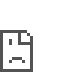
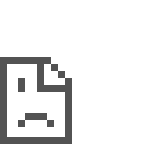
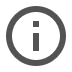
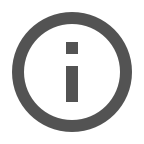
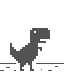
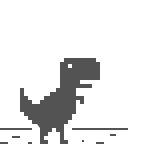
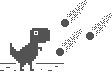
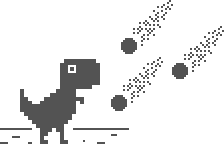
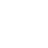
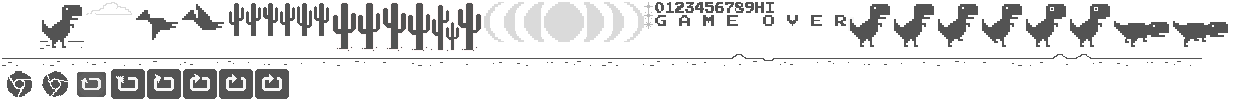
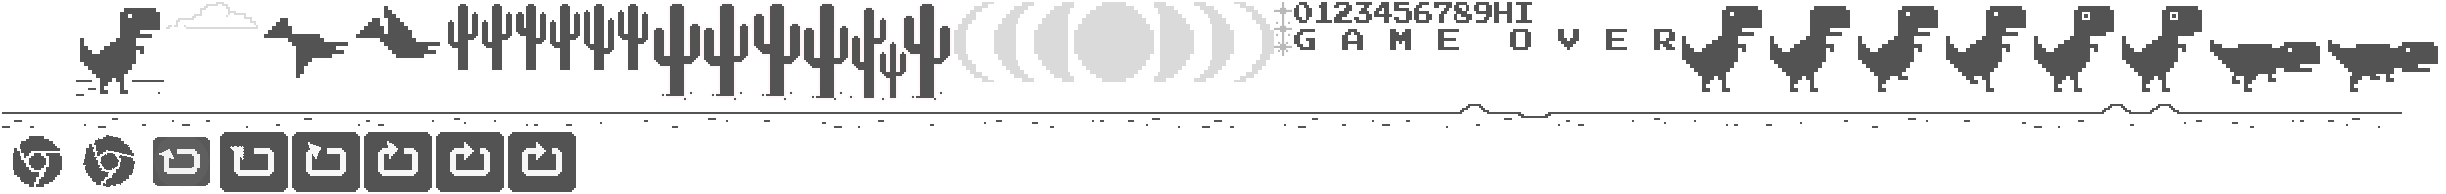

In [ ]:
soup2

In [ ]:
data_tokopedia = []
counter = 0

# blu-product__wrapper
for item in soup2.findAll('div', class_="css-5wh65g"):
  # ektrak produk detail
  produk_element = item.find('span', class_="OWkG6oHwAppMn1hIBsC3pQ==")
  # harga_element = item.find('div', class_="gJHohDcsji+TjH4Kkc9LEw==").text
  rating_element = item.find('span', class_="nBBbPk9MrELbIUbobepKbQ==")
  sold_element = item.find('span', class_="eLOomHl6J3IWAcdRU8M08A==")
  lokasi_element = item.find('div', class_="-9tiTbQgmU1vCjykywQqvA== flip")

  produk_nama = produk_element.text.strip() if produk_element else 'Not Available'
  rating = rating_element.text.strip() if rating_element else 'Not Available'
  sold = sold_element.text.strip() if sold_element else 'Not Available'
  lokasi = lokasi_element.text.strip() if lokasi_element else 'Not Available'

  data_tokopedia.append({
      "produk" : produk_nama,
      "rating" : rating,
      "sold" : sold,
      "lokasi" : lokasi
      })
  if counter == 50:
      break
  # else:
  #   print('tidak dapat menscrapping data')
  counter += 1

In [ ]:
print(counter)
data_tokopedia

0


[]

#Scraper shopee

In [ ]:
url3 = 'https://shopee.co.id/search?keyword=hp%20android%20samsung'
driver = web_driver()
driver.get(url3)
time.sleep(50)
soup = BeautifulSoup(driver.page_source, 'html.parser')

driver.close()

In [ ]:
print(soup.prettify())

<html class="roboto" dir="ltr" lang="id">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=1240,shrink-to-fit=no" name="viewport"/>
  <meta content="a37e2753b371fa5288f9a4ddbca1b2056f5a74b2" name="shopee:git-sha"/>
  <meta content="sw-WEBFE-MKP-2024.09.v1-1" name="shopee:version"/>
  <link href="https://deo.shopeemobile.com/shopee/shopee-pcmall-live-sg/assets/icon_favicon_1_32.0Wecxv.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="https://deo.shopeemobile.com/shopee/shopee-pcmall-live-sg/assets/icon_favicon_1_96.wI1aMs.png" rel="icon" sizes="96x96" type="image/png"/>
  <link as="style" data-modern="true" href="https://deo.shopeemobile.com/shopee/shopee-pcmall-live-sg/assets/modules.0ad4ffedf1e3e7bc.css" rel="preload"/>
  <link as="style" data-modern="true" href="https://deo.shopeemobile.com/shopee/shopee-pcmall-live-sg/assets/bundle.8548a07a331aac4a.css" rel="preload"/>
  <link data-modern="true" href="https://deo.shopeemobile.com/shopee/shopee-pcmall-live-sg/ass

In [ ]:
data_shopee = []
counter = 0

# blu-product__wrapper
for item in soup.findAll('div', class_="col-xs-2-4 shopee-search-item-result__item"):
  produk = item.find('span', class_="whitespace-normal line-clamp-2 break-words min-h-[2.5rem] text-sm").text

  data_tokopedia.append((produk))
  # if counter == 50:
  #     break
  # # else:
  # #   print('tidak dapat menscrapping data')
  # counter += 1

In [ ]:
data_shopee

#Scraper Bukalapak

In [ ]:
url4 = 'https://www.bukalapak.com/products?search%5Bkeywords%5D=android%20hp%20samsung'
driver = web_driver()
driver.get(url4)
time.sleep(3)
soup = BeautifulSoup(driver.page_source, "html.parser")

driver.close()

<html lang="id-ID" xmlns="http://ogp.me/ns/fb#"><head><script async="" src="https://certify-js.alexametrics.com/atrk.js" type="text/javascript"></script><script async="" src="https://cdn.krxd.net/controltag/tgpnc5f66.js" type="text/javascript"></script><script async="" src="https://static.criteo.net/js/ld/ld.js" type="text/javascript"></script><script async="" src="https://analytics.tiktok.com/i18n/pixel/static/identify_7bf75739.js" type="text/javascript"></script><script async="" data-id="C7EMQ24RNSL79GUTC4B0" src="https://analytics.tiktok.com/i18n/pixel/static/main.MTkzZDVlN2M0NA.js" type="text/javascript"></script><script async="" data-id="C7EMQ24RNSL79GUTC4B0" src="https://analytics.tiktok.com/i18n/pixel/static/main.MTkzZDVlN2M0NA.js" type="text/javascript"></script><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script async="" src="https://analytics.tiktok.com/i18n/pixel/sdk.js?sdkid=C7EMQ24RNSL79GUTC4B0" type="text/javascript
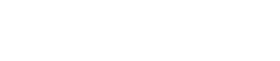
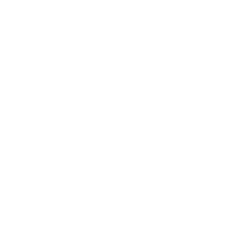
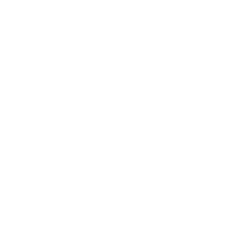
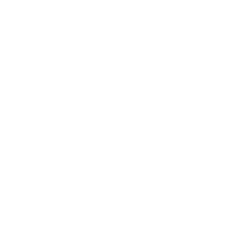
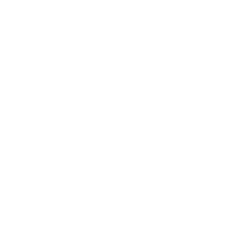
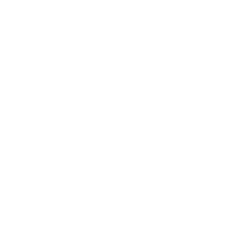
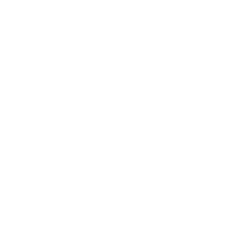
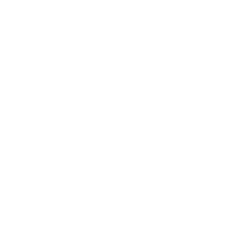
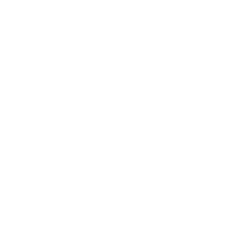
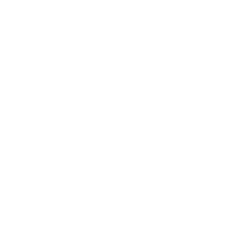
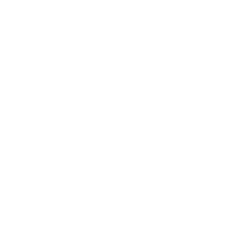
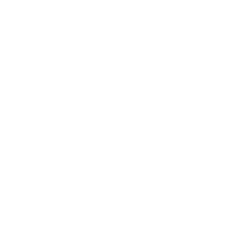
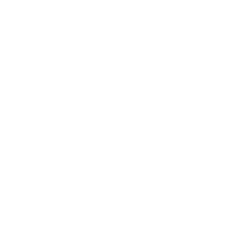
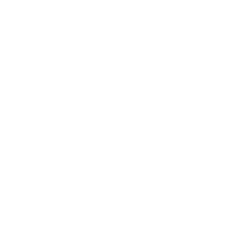
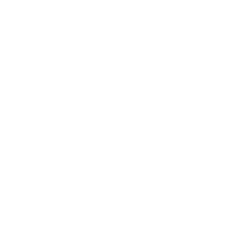
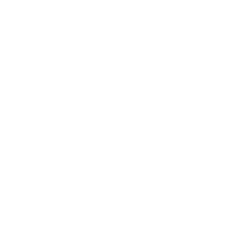
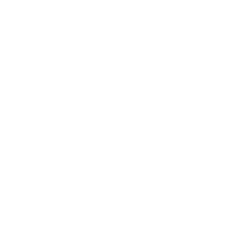
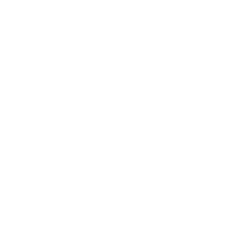
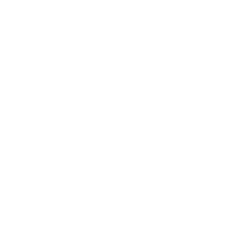
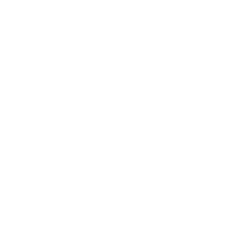
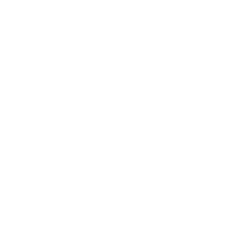

In [ ]:
soup

In [ ]:
data_bukalapak = []
counter = 0
# blu-product__wrapper
for item in soup.findAll('div', class_="bl-flex-item mb-8"):
  produk = item.find('p', class_="bl-text bl-text--body-14 bl-text--secondary bl-text--ellipsis__2").get_text(strip=True)
  data_bukalapak.append((produk))
  # if counter == 50:
  #     break
  # # # else:
  # # #   print('tidak dapat menscrapping data')
  # counter += 1

In [ ]:
data_bukalapak

['Kabel Data HP USB Type C Fast Charge Android Samsung Vention COD-15',
 'Kabel Data HP USB Type C Fast Charge Android Samsung Vention COD-15',
 'Tripod Stabilizer 3110 For Smartphone Monopod Sport Camera Tripod Kamera Fotografi Photo Mini HP Android Murah Aksesoris HP Samsung Xiaomi Iphone',
 'Samsung Galaxy A55 5G 8/128 8/256 12/256 GB RAM 8 12 ROM 128 256 GB 8GB 12GB 128GB 256GB Original HP Smartphone Android',
 'Samsung Galaxy A15 4G 5G 8/128 8/256 RAM 8 ROM 128 256 GB 8GB 128GB 256GB Original HP Smartphone Android',
 'Samsung Galaxy A54 5G 8/128 8/256 GB RAM 8 ROM 128 256 8GB 128GB 256GB Original SEIN HP Smartphone Android',
 'Samsung Galaxy A35 5G 8/128 8/256 GB RAM 8 ROM 128 256 GB 8GB 128GB 256GB Original HP Smartphone Android',
 'Obeng Set Masa Kini Macam Alat Buka Ganti Bongkar Casing Hp Handphone iPhone - Android - Samsung Oppo Lenovo Asus Xiaomi Redmi Vivo Nokia Dan Lainnya',
 'Mcdodo HP 2650 DAC Hifi Stereo In-Ear Type-C Headset - Earphone Handsfree Original Android Full S

In [ ]:
x = pd.DataFrame(data_bukalapak)
x

,0
0,Kabel Data HP USB Type C Fast Charge Android S...
1,Kabel Data HP USB Type C Fast Charge Android S...
2,Tripod Stabilizer 3110 For Smartphone Monopod ...
3,Samsung Galaxy A55 5G 8/128 8/256 12/256 GB RA...
4,Samsung Galaxy A15 4G 5G 8/128 8/256 RAM 8 ROM...
5,Samsung Galaxy A54 5G 8/128 8/256 GB RAM 8 ROM...
6,Samsung Galaxy A35 5G 8/128 8/256 GB RAM 8 ROM...
7,Obeng Set Masa Kini Macam Alat Buka Ganti Bong...
8,Mcdodo HP 2650 DAC Hifi Stereo In-Ear Type-C H...
9,Charger Carger Hp Samsung A8 A8Plus Plus USB T...


In [ ]:
data_bukalapak = []
counter = 0
for item in soup.findAll('div', class_="bl-flex-item mb-8"):
  produk = item.find('p', class_="bl-text bl-text--body-14 bl-text--secondary bl-text--ellipsis__2").get_text(strip=True)
  harga = item.find('p', class_="bl-text bl-text--semi-bold bl-text--ellipsis__1 bl-product-card-new__price").get_text(strip=True)
  lokasi = item.find('p', class_="bl-text bl-text--caption-12 bl-text--secondary bl-text--ellipsis__1 bl-product-card-new__store-location").get_text(strip=True)
  feedback = item.findAll('span', class_="bl-text bl-text--caption-12 bl-text--subdued bl-text--ellipsis__1")
  if(len(feedback)>=1) :
    feedback = feedback[0].get_text(strip=True)
  else :
    feedback = 0
  sold = item.findAll('p',class_="bl-text bl-text--caption-12 bl-text--secondary bl-product-card-new__sold-count")
  if(len(sold)>=1) :
    sold = sold[0].get_text(strip=True)
  else :
    sold = 0
  data_bukalapak.append((produk, harga, lokasi,sold ,feedback))

In [ ]:
data_bukalapak

[('Kabel Data HP USB Type C Fast Charge Android Samsung Vention COD-15',
  '89.000',
  'Jakarta Utara',
  0,
  '20rb Feedback positif'),
 ('Kabel Data HP USB Type C Fast Charge Android Samsung Vention COD-15',
  '89.000',
  'Jakarta Utara',
  0,
  '20rb Feedback positif'),
 ('Tripod Stabilizer 3110 For Smartphone Monopod Sport Camera Tripod Kamera Fotografi Photo Mini HP Android Murah Aksesoris HP Samsung Xiaomi Iphone',
  '50.000',
  'Tangerang',
  'Terjual 82',
  '12rb Feedback positif'),
 ('Samsung Galaxy A55 5G 8/128 8/256 12/256 GB RAM 8 12 ROM 128 256 GB 8GB 12GB 128GB 256GB Original HP Smartphone Android',
  '6.199.000',
  'Jakarta Pusat',
  'Terjual 3',
  '4rb Feedback positif'),
 ('Samsung Galaxy A15 4G 5G 8/128 8/256 RAM 8 ROM 128 256 GB 8GB 128GB 256GB Original HP Smartphone Android',
  '2.449.000',
  'Jakarta Pusat',
  'Terjual 3',
  '4rb Feedback positif'),
 ('Samsung Galaxy A54 5G 8/128 8/256 GB RAM 8 ROM 128 256 8GB 128GB 256GB Original SEIN HP Smartphone Android',
  '5.

In [ ]:
x_bukalapak = pd.DataFrame(data_bukalapak)
x_bukalapak.columns = ['produk','harga', 'lokasi','terjual' ,'feedback']
x_bukalapak['feedback'] = x_bukalapak['feedback'].astype(str)
x_bukalapak['feedback'] = x_bukalapak['feedback'].apply(lambda x : x.strip('Feedback positif').replace('r','000'))
x_bukalapak['terjual'] = x_bukalapak['terjual'].astype(str)
x_bukalapak['terjual'] = x_bukalapak['terjual'].apply(lambda x : x.strip('Terjual'))
x_bukalapak


,produk,harga,lokasi,terjual,feedback
0,Kabel Data HP USB Type C Fast Charge Android S...,89.000,Jakarta Utara,0,20000
1,Kabel Data HP USB Type C Fast Charge Android S...,89.000,Jakarta Utara,0,20000
2,Tripod Stabilizer 3110 For Smartphone Monopod ...,50.000,Tangerang,82,12000
3,Samsung Galaxy A55 5G 8/128 8/256 12/256 GB RA...,6.199.000,Jakarta Pusat,3,4000
4,Samsung Galaxy A15 4G 5G 8/128 8/256 RAM 8 ROM...,2.449.000,Jakarta Pusat,3,4000
5,Samsung Galaxy A54 5G 8/128 8/256 GB RAM 8 ROM...,5.999.000,Jakarta Pusat,0,4000
6,Samsung Galaxy A35 5G 8/128 8/256 GB RAM 8 ROM...,4.499.000,Jakarta Pusat,0,4000
7,Obeng Set Masa Kini Macam Alat Buka Ganti Bong...,85.000,Jakarta Pusat,24,20000
8,Mcdodo HP 2650 DAC Hifi Stereo In-Ear Type-C H...,148.500,Bandung,0,11000
9,Charger Carger Hp Samsung A8 A8Plus Plus USB T...,165.000,Jakarta Pusat,1,20000


#Scraper lazada

In [ ]:
url6 = 'https://www.lazada.co.id/tag/samsung/?spm=a2o4j.homepage.search.d_go&q=samsung&catalog_redirect_tag=true'
driver = web_driver()
driver.get(url6)
time.sleep(7)
soup = BeautifulSoup(driver.page_source, "html.parser")

driver.close()


In [ ]:
import requests
response = requests.get(url6)

# Cek status kode dari respon
print("Status code:", response.status_code)

# Cek konten dari respon (HTML)
print("Response content:", response.text[:500])  # Hanya print 500 karakter pertama


Status code: 200
Response content: 
<!DOCTYPE html>
<html lang="id">
  <head>
    <meta charset="utf-8" />
    <meta name="data-spm" content="a2o4j" />
    <meta http-equiv="x-ua-compatible" content="ie=edge" />
    <meta name="viewport" content="width=device-width" />
    <meta name="referrer" content="origin" />
    <meta name="lzd-itrace-close-auto-monitor" content="assetPerf,imagesPerf">
    
    <link rel="preconnect dns-prefetch" href="//cart.lazada.co.id" />
    <link rel="preconnect dns-prefetch" href="//member.lazada.co


<html lang="id">
 <head>
  <style data-css-hash="vk0dn8" data-rc-order="prependQueue" data-rc-priority="-999" data-token-hash="app">
   .app{--ant-blue:#1677ff;--ant-purple:#722ED1;--ant-cyan:#13C2C2;--ant-green:#52C41A;--ant-magenta:#EB2F96;--ant-pink:#eb2f96;--ant-red:#F5222D;--ant-orange:#FA8C16;--ant-yellow:#FADB14;--ant-volcano:#FA541C;--ant-geekblue:#2F54EB;--ant-gold:#FAAD14;--ant-lime:#A0D911;--ant-color-primary:#1677ff;--ant-color-success:#52c41a;--ant-color-warning:#faad14;--ant-color-error:#ff4d4f;--ant-color-info:#1677ff;--ant-color-link:#1677ff;--ant-color-text-base:#000;--ant-color-bg-base:#fff;--ant-font-family:-apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, 'Helvetica Neue', Arial,
'Noto Sans', sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol',
'Noto Color Emoji';--ant-font-family-code:'SFMono-Regular', Consolas, 'Liberation Mono', Menlo, Courier, monospace;--ant-font-size:14px;--ant-line-width:1px;--ant-line-type:solid;--ant-motion-ease-out-ci
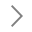

In [ ]:
print(soup.prettify())

In [ ]:
data_lazada = []
counter = 0

# Memilih elemen dengan class "Bm3ON"
for item in soup.findAll('div', class_="Bm3ON"):
    # Memastikan elemen span ditemukan sebelum mengambil teks
    produk = item.find('div', class_="RfADt").get_text(strip=True)
    # if produk:
    #     produk_text = produk
    harga = item.find('span', class_="ooOxS").get_text(strip=True)
    # sold = item.find('span', class_="_1cEkb").get_text(strip=True)
    # Mengambil elemen span dengan class _1cEkb
    terjual_element = soup.find('span', class_='_1cEkb')
    if terjual_element:
      terjual = terjual_element.find('span').get_text(strip=True)
    else:
      print("Elemen tidak ditemukan")
    lokasi = item.find('span', class_="oa6ri").get_text(strip=True)
    data_lazada.append((produk, harga, terjual, lokasi))

    # Menghentikan setelah 50 produk (aktifkan jika diperlukan)
    if counter == 50:
        break
    counter += 1

# Output jumlah produk yang diambil
print(f"Total produk yang diambil: {len(data_lazada)}")


Total produk yang diambil: 0


In [ ]:
data_lazada

[]

In [ ]:
x = pd.DataFrame(data_lazada)
